# Transfer Learning Image Classifier

In this notebook, we will show how **train.py** and **predict.py** train a model which classifies images according to given data, and then predict the classification of a new image.

## train.py

First, let's use train.py to train a new model.
We begin by looking at the help command for the script.

In [16]:
%run train.py --help

usage: train.py [-h] [--save_dir SAVE_DIR] [--arch ARCH]
                [--hidden_units HIDDEN_UNITS] [--epochs EPOCHS]
                [--print_every PRINT_EVERY] [--gpu] [--lr LR] [--graph_stats]
                data_dir

Train an classifier using a pre-trained model.

positional arguments:
  data_dir              Location of data, with 'train' and 'valid' subfolders,
                        and images partitioned into further subfolders.

optional arguments:
  -h, --help            show this help message and exit
  --save_dir SAVE_DIR   Location to save the model checkpoint (default: in-
                        place)
  --arch ARCH           Torchvision pretrained model architecture to use
                        (default = vgg16_bn)
  --hidden_units HIDDEN_UNITS
                        Size of the two layers of hidden units
                        (default=[4096,1024])
  --epochs EPOCHS       Epochs (default=6)
  --print_every PRINT_EVERY
                        How often to print

It looks like train.py has one required input *data_dir*, and several possible options.
- *data_dir* should have subfolders corresponding to training data and validation data, each partitioned into subfolders of classes.

The optional classes allow us to change several modeling features:
- the architecture of the pretrained model 
- the number of nodes in each of the middle two hidden layers
- the number of epochs the model trains for
- what the learning rate of the model is during training

as well as two "quality of life" controls:
- how often statistics are displayed as the model is training
- whether or not to display plots of the training and validating loss over time
- whether to (try to) use a GPU during training
- where to save the checkpoint information after the model has been trained.

We see that the folder *example_data* is organized precisely as required for data_dir.
We note that this data is quite small, and will most likely not give a well-trained model. But we will not worry about that here.

Let's now train our model.
We'll use Alexnet, print every round (as the batch size is larger than the number of images), and display the losses over time.

Data loaded
Model created
Epoch 1 starting...
Epoch 1
Running Loss: 4.738226890563965
Validating Accuracy: 0.5
Validating Loss: 0.7611197233200073
Epoch 2 starting...
Epoch 2
Running Loss: 1.7216495275497437
Validating Accuracy: 0.5
Validating Loss: 14.214012145996094
Epoch 3 starting...
Epoch 3
Running Loss: 17.15928840637207
Validating Accuracy: 0.5
Validating Loss: 1.5610642433166504
Epoch 4 starting...
Epoch 4
Running Loss: 0.002044227672740817
Validating Accuracy: 0.5
Validating Loss: 5.523944854736328
Epoch 5 starting...
Epoch 5
Running Loss: 11.879916191101074
Validating Accuracy: 0.5
Validating Loss: 3.477140188217163
Epoch 6 starting...
Epoch 6
Running Loss: 2.4088916778564453
Validating Accuracy: 0.5
Validating Loss: 7.370538711547852
Model trained!
Final validation accuracy: 0.5


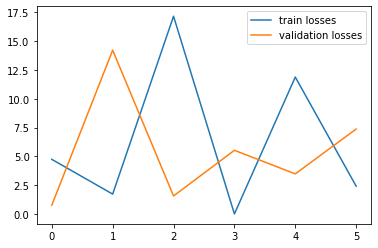

Checkpoint created at checkpoint.pth


In [21]:
%matplotlib inline
%run train.py example_data --arch=alexnet --print_every=1 --graph_stats

## predict.py

We will now use predict.py to load our checkpoint and predict the classification of the image TEST_IMG.

In [27]:
%run predict.py --help

usage: predict.py [-h] [--topk TOPK] [--category_names CATEGORY_NAMES] [--gpu]
                  [--graph_pred]
                  image_path checkpoint

Predict image name from a model checkpoint.

positional arguments:
  image_path            Path to image
  checkpoint            Checkpoint for model

optional arguments:
  -h, --help            show this help message and exit
  --topk TOPK           Return the top K most likely classes (default=5)
  --category_names CATEGORY_NAMES
                        Dictionary mapping categorical class outputs to actual
                        names (default: 'cat_to_name.json')
  --gpu                 Use GPU (default=False)
  --graph_pred          Graph predictions (default=False)


This script has two necessary inputs, *image_path* and *checkpoint*.

Additionally, there are three optional inputs:
- how many top probabilities to display (here we only have 2 classes, so this will be less useful)
- where the dictionary mapping categorical classes to actual names of things
- whether or not to use a GPU (if available)

Checkpoint Loaded!
Model created!


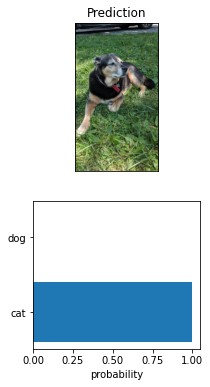

In [34]:
%run predict.py TEST_IMG.jpg checkpoint.pth --category_names=example_data/cat_to_name.json --topk=2 --graph_pred

topk int, added and updatedgraphing options to both

As you can see, our model is not very good, as we only trained it on 5 images.
However, simply by adding more images, or even classes (as long as cat_to_name is also updated) these scripts will build better and better models.